In [3]:
import tensorflow as tf
from keras.layers import TFSMLayer

output_dir = 'Best_model'
model = TFSMLayer(output_dir, call_endpoint='serving_default')

print("Model loaded successfully as TFSMLayer.")



Model loaded successfully as TFSMLayer.


In [4]:
import tensorflow as tf
from keras.layers import TFSMLayer
import cv2
import numpy as np
import matplotlib.pyplot as plt

output_dir = 'Best_model' 
model = TFSMLayer(output_dir, call_endpoint='serving_default')

print("Model loaded successfully using TFSMLayer.")




Model loaded successfully using TFSMLayer.


Raw model output: {'dense_2': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9967952]], dtype=float32)>}
Prediction: Malignant (Cancer)


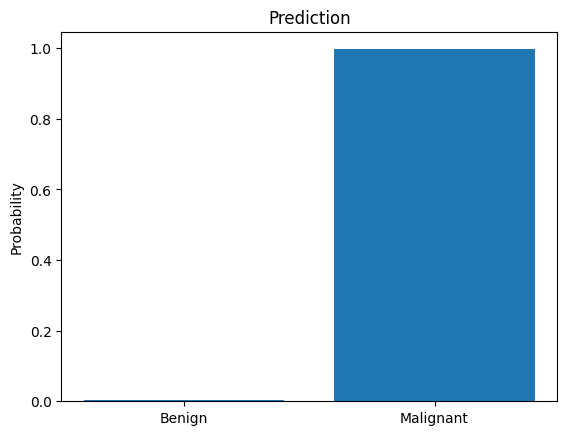

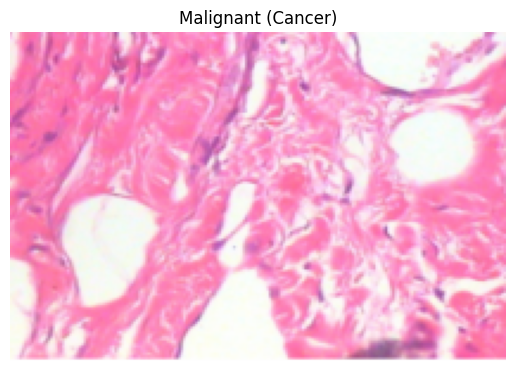

In [7]:
def predict_single_image(image_path):
    from PIL import Image
    
    img = cv2.imread(image_path)
    
    img = cv2.resize(img, (128, 128))
    img = np.array(img) / 255.0
    
    img = np.expand_dims(img, axis=0)
    pred = model(img)  
    
    print(f"Raw model output: {pred}")
    
    pred_value = pred['dense_2'].numpy()[0][0]

    if pred_value > 0.5:
        prediction = "Malignant (Cancer)"
    else:
        prediction = "Benign (No Cancer)"
    
    print(f"Prediction: {prediction}")

    # save image of the input with the predicted class
    original_img = Image.open(image_path)
    plt.imshow(original_img)
    plt.title(f"Predicted: {prediction} with probability: {pred_value:.2f}")
    plt.savefig('result.jpg')
    plt.close()

    # Now save an image of histogram for the 2 classes
    plt.bar(["Benign", "Malignant"], [1-pred_value, pred_value])
    plt.ylabel("Probability")
    plt.title("Prediction")
    plt.savefig('stats.jpg') 
    plt.show()
    plt.close()

    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(prediction)
    plt.axis('off')
    plt.show()
    return prediction, pred_value

image_path = "image.png"  # Path to your test image
prediction, prob = predict_single_image(image_path)

In [13]:
print(f"the prediction is {prediction} with a probability of {prob}")   

the prediction is Malignant (Cancer) with a probability of 0.9967951774597168
